# Petrea Norgren

# TP1 — Multiple Linear Regression
Working in pairs is acceptable; however, I strongly recommend submitting the assignment individually. The deadline for this first assignment is February 16, 2026. Please send your response to razan.mhanna@inria.fr
 only.


**Dataset:** Diabetes (regression)

## Learning objectives
- Construct a design matrix and add an intercept
- Fit a multiple linear regression model (OLS)
- Interpret coefficients, p-values, and $R^2$
- Make predictions with confidence intervals
- Perform basic diagnostic checks


## Question 1 — Load the dataset
1. Load the **Diabetes** regression dataset.
2. Convert it to a pandas DataFrame.
3. Identify:
   - the number of observations $n$
   - the number of predictors $p$

👉 *Write the code below.*

In [1]:
#!pip -q install statsmodels scikit-learn pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import load_diabetes
pd.set_option('display.precision', 4)
print('Ready!')

Ready!


In [2]:
diab = load_diabetes(as_frame=True)
df = diab.frame.copy()

In [3]:
# YOUR CODE HERE
print('Dataframe columns: ', df.columns.tolist())
print('Number of observations:', df.shape[0])
print('Number of predictors:', df.shape[1]-1) #Target removed from predictors

Dataframe columns:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
Number of observations: 442
Number of predictors: 10


## Question 2 — Define $X$ and $y$
1. Define the response variable $y$.
2. Define the predictor matrix $X$.
3. Add an intercept column to $X$.

👉 *Explain why adding a constant is necessary when using statsmodels.*

see comment in code.

In [4]:
# YOUR CODE HERE
y = df['target']
X = df.drop(columns=['target'])
X = sm.add_constant(X)  # Needed as statsmodels does not add intercept by default and we 
                        # want to include a constant in our final model


## Question 3 — Fit the multiple linear regression model
1. Fit an **OLS** model using statsmodels.
2. Display the full regression summary.

👉 *Write down the estimated regression equation.*

\begin{align*}
    X &= \begin{bmatrix}
        1 &  age_1 & sex_1	& bmi_1 &s1_1	&s2_1	&S3_1	&s4_1 &s5_1 & s6_1	\\
        \vdots & \vdots & \vdots &\vdots &\vdots &\vdots &\vdots &\vdots &\vdots &\vdots\\
         1 &  age_N & sex_N	& bmi_N &s1_N	&s2_N	&s3_N	&s4_N &s5_N &s6_N
    \end{bmatrix}
    &\hat{\beta}= \begin{bmatrix}
        \hat{\beta_0}\\
        \vdots\\
        \hat{\beta_9}
    \end{bmatrix}
   &Y = \begin{bmatrix}
        target_1\\
        \vdots\\
        target_N
    \end{bmatrix}
\end{align*}
 The regression model that we use to approximate $Y=X\beta+\varepsilon$ has the form: $\hat{Y} = X\hat{\beta}$. We want to find values for $\hat{\beta}$ st. the $MSE := \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y_i})^2=\frac{1}{N}\sum_{i=1}^N(y_i-x_i\hat{\beta})^2$ is minimized. This is Achived by solving the equation
$X^TY = X^TX\hat{\beta}$.
\begin{align*}
    &X^TY = X^TX\hat{\beta} \iff \hat{\beta}=(X^TX)^{-1}X^TY \iff \hat{Y} = X(X^TX)^{-1}X^TY
\end{align*}

In the equations above $\varepsilon$ is a vector that contains the error of each observation i: $\varepsilon_i$, $\beta_0$ is the intercept and $\beta_1, ...,\beta_9$ is the coefficent that represents the expected change in the observation based on each predictor. 

In [5]:
# YOUR CODE HERE
sm_model = sm.OLS(y, X).fit()
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           3.83e-62
Time:                        21:39:09   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

## Question 4 — Interpretation of coefficients
Using the regression output:
1. Which predictors are statistically significant at the 5% level?

const(intercept), sex, bmi, bp, s5 all have p-values below 0.05.

2. Interpret **one significant coefficient** in words.

We can see that bmi seem to increase the value of the observation as it has a large, positive coefficent. 

3. Is the intercept meaningful in this context? Explain.

Yes, we can see that its p-value is below 0.05. We can also see that its confidence intervall is quite small and well above 0 indicating that with a probability of 95% the true value is infact quite high. 

## Question 5 — Goodness of fit
1. What is the value of $R^2$?

0.518

2. What does $R^2$ represent in this model?

$R^2$ explains how much of the total variation in Y is explained by the model. 

3. Compare $R^2$ and adjusted $R^2$. Why are they different?

The adjusted $R^2$ takes into account the number of datapoints/observations and penalises model complexity. $R^2$ always increases as the number of predictors increase, adjusted $R^2$ explains the proportion of varaiance explained by the model after accounting the number of predictors.

## Question 6 — Multicollinearity
1. Compute the correlation matrix of the predictors.
2. Identify any strongly correlated variables.

Strongly correlated (from strongest to weakest correlated): 

s1,s2

s3, s4

s2, s4

s4, s5

👉 *Explain how multicollinearity affects coefficient estimates.*

Multicollinearity causes the $X^TX$ to become nearly singular which makes the coefficent estimates unstable and the standard errors increase. (Remember $\hat{\beta}=(X^TX)^{-1}X^Ty$)

<Figure size 1000x800 with 0 Axes>

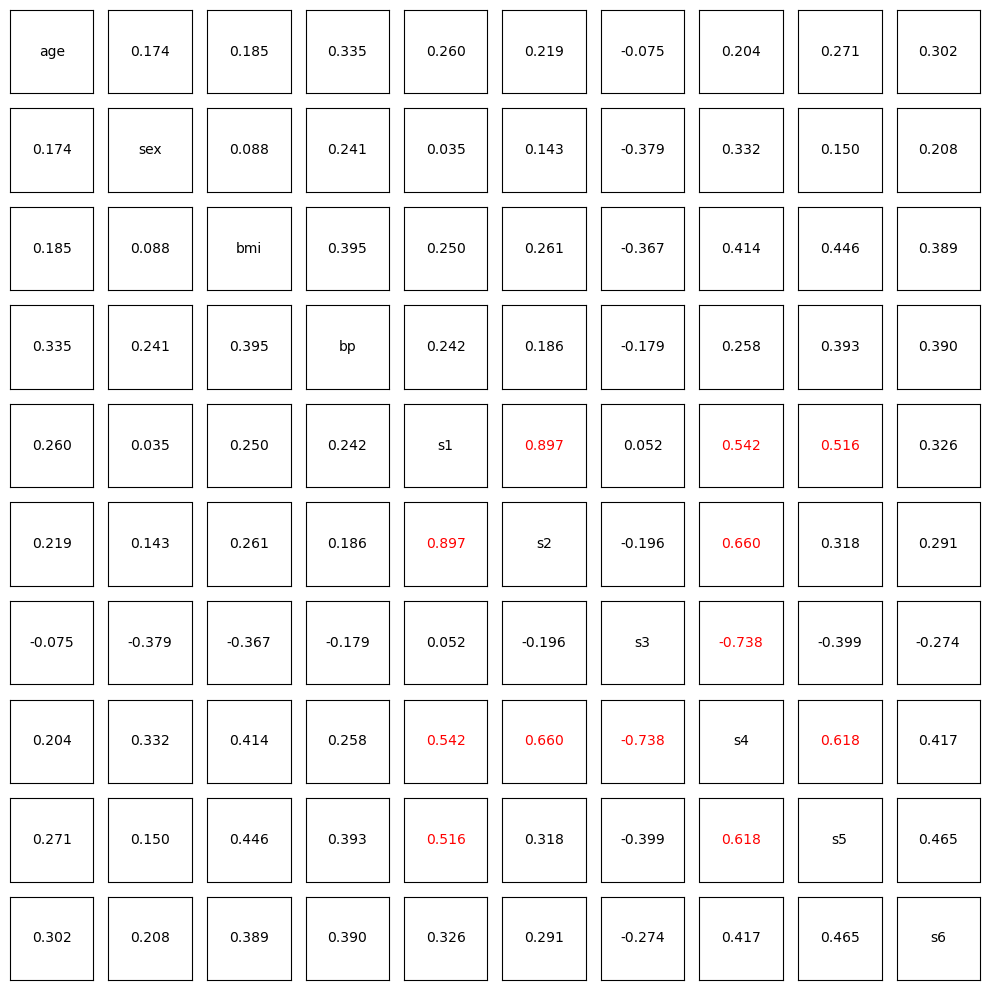

In [6]:
def corr_np(X,Y):
    x_mean = X.mean()                       #Calculates the mean of the input vector X
    y_mean = Y.mean()                       #Calculates the mean of the input vector Y
    c_xy = ((X-x_mean)*(Y-y_mean)).mean()   #approximation of the covariance between X and Y
    s_x_2 = ((X-x_mean)**2).mean()          #approximation of the variance of X
    s_y_2 = ((Y-y_mean)**2).mean()          #approximation of the variance of Y
    return c_xy/((s_x_2*s_y_2)**0.5) 

M = np.zeros((X.shape[1]-1, X.shape[1]-1))
for col in X.columns[1:]:  # Skip the constant column
    for col2 in X.columns[1:]:  # Skip the constant column
        M[X.columns.get_loc(col)-1, X.columns.get_loc(col2)-1] = round(corr_np(X[col], X[col2]),4)

plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(M.shape[0], M.shape[1], figsize=(10, 10))
for i in range(M.shape[0]):         
        for j in range(M.shape[1]):     
            axij = ax[i][j]         
            i_name = X.columns[i+1]  
            j_name = X.columns[j+1] 
            axij.set_xticks([])     
            axij.set_yticks([])
            axij.margins(0.1)
            if i == j:
                axij.text(0.5, 0.5, f"{i_name}", fontsize=10,
                                horizontalalignment='center',
                                verticalalignment='center',
                                transform = axij.transAxes)       
            else:
                corr = corr_np(X[i_name], X[j_name])
                if abs(corr) > 0.5:
                     color = 'red'
                else:
                    color = 'black'
                axij.text(0.5, 0.5, f"{(corr):.3f}", fontsize=10, color=color,
                                horizontalalignment='center',
                                verticalalignment='center',
                                transform = axij.transAxes)       

plt.tight_layout()
plt.show()

## Question 7 (Bonus) — Global significance of the model
1. State the null hypothesis tested by the **F-statistic**.

$H_0: \beta_1=...=\beta_p=0$

2. Based on the p-value, is the model globally significant?

Yes.

3. What does this tell you about the predictors as a group?

That they explain more variance than  intercept only model. 

In [7]:
# YOUR CODE HERE


In [8]:
# YOUR CODE HERE
